# 2023-Fall CSE362 HW2
### Student ID: 20181016
### Name: Kwon Yongmin

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.style.use('seaborn-whitegrid')
import numpy as np
import imageio
from PIL import Image as im

<ipython-input-72-2955f9172ccb>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


<ipython-input-73-f768d2690422>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_url)


Image size:  (312, 680, 3)


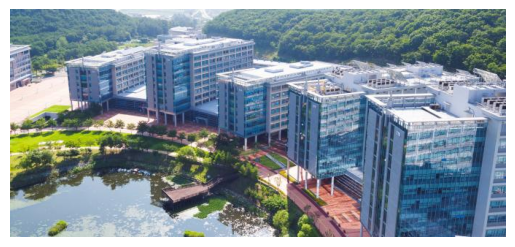

In [73]:
# original image
img_url = 'https://www.upinews.kr/data/upi/image/2021/06/24/upi202106240018.680.0.jpg'

img = imageio.imread(img_url)
print('Image size: ', img.shape)

def display_image(img):
  plt.figure()
  plt.imshow(img)
  plt.grid(False)
  plt.axis('off')

display_image(img)

In [74]:
import random
import numpy as np

SEED = 2

random.seed(SEED)
np.random.seed(SEED)

In [75]:
# please store values clustered by each k
# order by R, G, and B
result = {'k=1': [np.random.rand(1), np.random.rand(1), np.random.rand(1)],
          'k=3': [np.random.rand(3), np.random.rand(3), np.random.rand(3)],
          'k=6': [np.random.rand(6), np.random.rand(6), np.random.rand(6)],
          'k=9': [np.random.rand(9), np.random.rand(9), np.random.rand(9)]}
result

{'k=1': [array([0.4359949]), array([0.02592623]), array([0.54966248])],
 'k=3': [array([0.43532239, 0.4203678 , 0.33033482]),
  array([0.20464863, 0.61927097, 0.29965467]),
  array([0.26682728, 0.62113383, 0.52914209])],
 'k=6': [array([0.13457995, 0.51357812, 0.18443987, 0.78533515, 0.85397529,
         0.49423684]),
  array([0.84656149, 0.07964548, 0.50524609, 0.0652865 , 0.42812233,
         0.09653092]),
  array([0.12715997, 0.59674531, 0.226012  , 0.10694568, 0.22030621,
         0.34982629])],
 'k=9': [array([0.46778748, 0.20174323, 0.64040673, 0.48306984, 0.50523672,
         0.38689265, 0.79363745, 0.58000418, 0.1622986 ]),
  array([0.70075235, 0.96455108, 0.50000836, 0.88952006, 0.34161365,
         0.56714413, 0.42754596, 0.43674726, 0.77655918]),
  array([0.53560417, 0.95374223, 0.54420816, 0.08209492, 0.3663424 ,
         0.8508505 , 0.40627504, 0.02720237, 0.24717724])]}

In [76]:
rng = np.random.RandomState(SEED)
K = [1, 3, 6, 9]

# initial cluster for each k
k_means_r = []
k_means_g = []
k_means_b = []

### DO NOT CHANGE HERE ###
for k in K:
  k_means_r.append(rng.uniform(low=0, high=255, size=k))
  k_means_g.append(rng.uniform(low=0, high=255, size=k))
  k_means_b.append(rng.uniform(low=0, high=255, size=k))

print(k_means_r)
print(k_means_g)
print(k_means_b)

##### TODO #####
# Note that in this assignment, our iteration for each k value is 3
cls_result = []
cls_color_result = []
for index, k_value in enumerate(K):
  initial_point_list = []
  r = k_means_r[index]
  g = k_means_g[index]
  b = k_means_b[index]

  for i in range(k_value):
    point_list = np.array([r[i], g[i], b[i]])
    initial_point_list.append(point_list)

  print(initial_point_list)

  cls_list = []
  for i in range(3):
    temp_cls_list = []
    for a in range(k_value):
      temp_cls_list.append([])
    for j in range(312):
      for k in range(680):
        img_point = img[j][k]
        dis = []
        for point in initial_point_list:
          dis.append(np.linalg.norm(point - (img_point)))
        min_dis = min(dis)
        temp_cls = dis.index(min_dis)
        # if index == 2:
        #   print(f"classfied as {temp_cls}")
        temp_cls_list[temp_cls].append(img_point)

    for l in range(k_value):
      temp_cls_list_l = temp_cls_list[l]
      np_temp_cls_list_l = np.array(temp_cls_list_l)
      if len(temp_cls_list_l) != 0:
        temp_cls_list_l = np.array(temp_cls_list_l)
        new_point = np.mean(temp_cls_list_l, axis=0)
        initial_point_list[l] = new_point

  cls_color_result.append(initial_point_list)

print(cls_color_result)

[array([111.17870005]), array([111.00721012, 107.19378953,  84.23537936]), array([ 34.31788606, 130.96242092,  47.03216574, 200.26046269,
       217.76369962, 126.03039353]), array([119.28580857,  51.4445227 , 163.30371493, 123.18280807,
       128.8353636 ,  98.65762604, 202.37755088, 147.90106561,
        41.38614262])]
[array([6.61118912]), array([ 52.18540168, 157.91409642,  76.41194179]), array([215.87317877,  20.30959664, 128.83775298,  16.64805862,
       109.17119354,  24.61538349]), array([178.69184838, 245.96052542, 127.5021321 , 226.82761631,
        87.11148143, 144.62175255, 109.02422064, 111.37055207,
       198.02259217])]
[array([140.16393186]), array([ 68.04095515, 158.38912736, 134.93123404]), array([ 32.42579278, 152.17005379,  57.63306015,  27.2711495 ,
        56.1780828 ,  89.20570268]), array([136.57906424, 243.20426787, 138.77308084,  20.93420518,
        93.41731243, 216.96687852, 103.60013598,   6.9366033 ,
        63.03019594])]
[array([111.17870005,   6.6111

In [77]:
img_masks = [img.copy(), img.copy(), img.copy(), img.copy()]
for index, img_mask in enumerate(img_masks):
  for j in range(312):
      for k in range(680):
        dist = []
        for color in cls_color_result[index]:
          dist.append(np.linalg.norm(img_mask[j][k] - color))
        min_dist = min(dist)
        cls = dist.index(min_dist)
        img_mask[j][k] = cls_color_result[index][cls]

original image


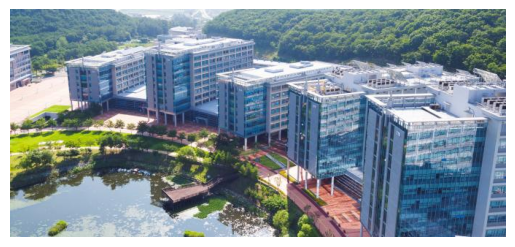

In [78]:
##### Visualize your results #####
print("original image")
display_image(img)

k=1


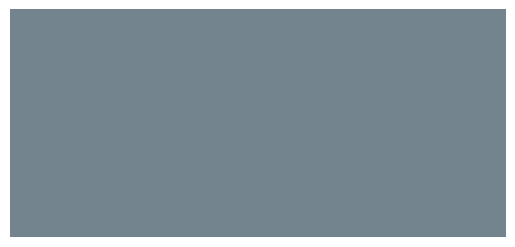

In [79]:
print("k=1")
display_image(np.asarray(img_masks[0], dtype=int))

k=3


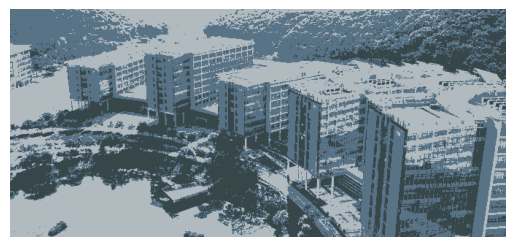

In [80]:
print("k=3")
display_image(np.asarray(img_masks[1], dtype=int))

k=6


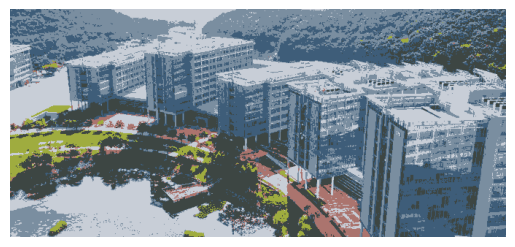

In [81]:
print("k=6")
display_image(np.asarray(img_masks[2], dtype=int))

k=9


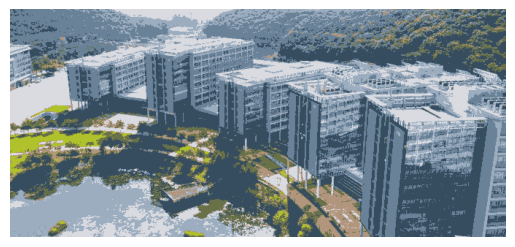

In [82]:
print("k=9")
display_image(np.asarray(img_masks[3], dtype=int))

In [83]:
##### Print your values #####
for index, key in enumerate(list(result.keys())):
  result[key] = cls_color_result[index]
for value in result:
  print(value, result[value])

k=1 [array([116.16496041, 132.53160822, 142.75459087])]
k=3 [array([55.79614353, 70.08979171, 73.28628583]), array([177.16812817, 186.12922919, 190.96027669]), array([ 88.91681465, 114.29221169, 134.41991596])]
k=6 [array([159.43532934, 172.96766467,  63.40898204]), array([122.29902601, 142.86318149, 160.52412697]), array([ 62.46074231,  93.04139974, 121.34665279]), array([171.9684466 , 116.02953074, 110.52588997]), array([200.96990815, 206.3267907 , 215.01270166]), array([61.06572806, 70.25244321, 67.76132642])]
k=9 [array([106.11057338, 130.9277297 , 152.3570876 ]), array([ 51.4445227 , 245.96052542, 243.20426787]), array([217.45189504, 219.56447124, 224.86171482]), array([175.80161812, 193.50711974,  43.7236246 ]), array([54.60827967, 76.24468191, 95.5227797 ]), array([156.2477846 , 173.73455399, 192.3679254 ]), array([177.53467423, 150.84242349, 125.98420533]), array([105.56329687, 113.43612733,  73.67442626]), array([ 41.38614262, 198.02259217,  63.03019594])]
